In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

In [ ]:
#Load the data 
from google.colab import files
uploaded=files.upload()
df = pd.read_csv('features_30_sec.csv')
df.head(7)

Saving features_30_sec.csv to features_30_sec.csv


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,1.297741e+05,2002.449060,85882.761315,3805.839606,9.015054e+05,0.083045,0.000767,-4.529724e-05,0.008172,0.000008,0.005698,123.046875,-113.570648,2564.207520,121.571793,295.913818,-19.168142,235.574432,42.366421,151.106873,-6.364664,167.934799,18.623499,89.180840,-13.704891,67.660492,15.343150,68.932579,-12.274110,82.204201,10.976572,63.386311,-8.326573,61.773094,8.803792,51.244125,-3.672300,41.217415,5.747995,40.554478,-5.162882,49.775421,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,3.758501e+05,2039.036516,213843.755497,3550.522098,2.977893e+06,0.056040,0.001448,1.395807e-04,0.005099,-0.000178,0.003063,67.999589,-207.501694,7764.555176,123.991264,560.259949,8.955127,572.810913,35.877647,264.506104,2.907320,279.932922,21.510466,156.477097,-8.560436,200.849182,23.370686,142.555954,-10.099661,166.108521,11.900497,104.358612,-5.555639,105.173630,5.376327,96.197212,-2.231760,64.914291,4.220140,73.152534,-6.012148,52.422142,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,1.564676e+05,1747.702312,76254.192257,3042.260232,7.840345e+05,0.076291,0.001007,2.105576e-06,0.016342,-0.000019,0.007458,161.499023,-90.722595,3319.044922,140.446304,508.765045,-29.093889,411.781219,31.684334,144.090317,-13.984504,155.493759,25.764742,74.548401,-13.664875,106.981827,11.639934,106.574875,-11.783643,65.447945,9.718760,67.908859,-13.133803,57.781425,5.791199,64.480209,-8.907628,60.385151,-1.077000,57.711136,-9.229274,36.580986,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,1.843559e+05,1596.412872,166441.494769,2184.745799,1.493194e+06,0.033309,0.000423,4.583644e-07,0.019054,-0.000014,0.002712,63.024009,-199.544205,5507.517090,150.090897,456.505402,5.662678,257.161163,26.859079,158.267303,1.771399,268.034393,14.234031,126.794128,-4.832006,155.912079,9.286494,81.273743,-0.759186,92.114090,8.137607,71.314079,-3.200653,110.236687,6.079319,48.251999,-2.480174,56.799400,-1.079305,62.289902,-2.870789,51.651592,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,3.433999e+05,1748.172116,88445.209036,3579.757627,1.572978e+06,0.101461,0.001954,-1.756129e-05,0.004814,-0.000010,0.003094,135.999178,-160.337708,5195.291992,126.219635,853.784729,-35.587811,333.792938,22.148071,193.456100,-32.478600,336.276825,10.852294,134.831573,-23.352329,93.257095,0.498434,124.672127,-11.793437,130.073349,1.207256,99.675575,-13.088418,80.254066,-2.813867,86.430626,-6.933385,89.555443,-7.552725,70.943336,-9.164666,75.793404,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
5,blues.00005.wav,661794,0.302456,0.087532,0.103494,0.003981,1831.993940,1.030482e+06,1729.653287,201910.508633,3481.517592,3.274440e+06,0.094042,0.0062

In [ ]:
#count the number of colum and row in data set
df.shape

(1000, 60)

In [ ]:
#count the number of empty( NaN, NAN, na) value in each column
df.isna().sum()

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


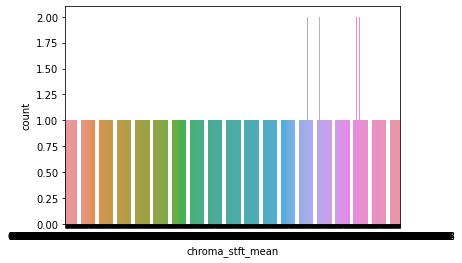

In [ ]:
#visualize the count

sns.countplot(df['chroma_stft_mean'],label='count')

In [ ]:
#look at the data type to see which columns need to be encoded
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [ ]:
#encoder the categorical data values
from sklearn.preprocessing import LabelEncoder
labelencode_Y =LabelEncoder()
df.iloc[:,1] labelencode_Y.fit_transform(df.iloc[:,1].values)

SyntaxError: ignored

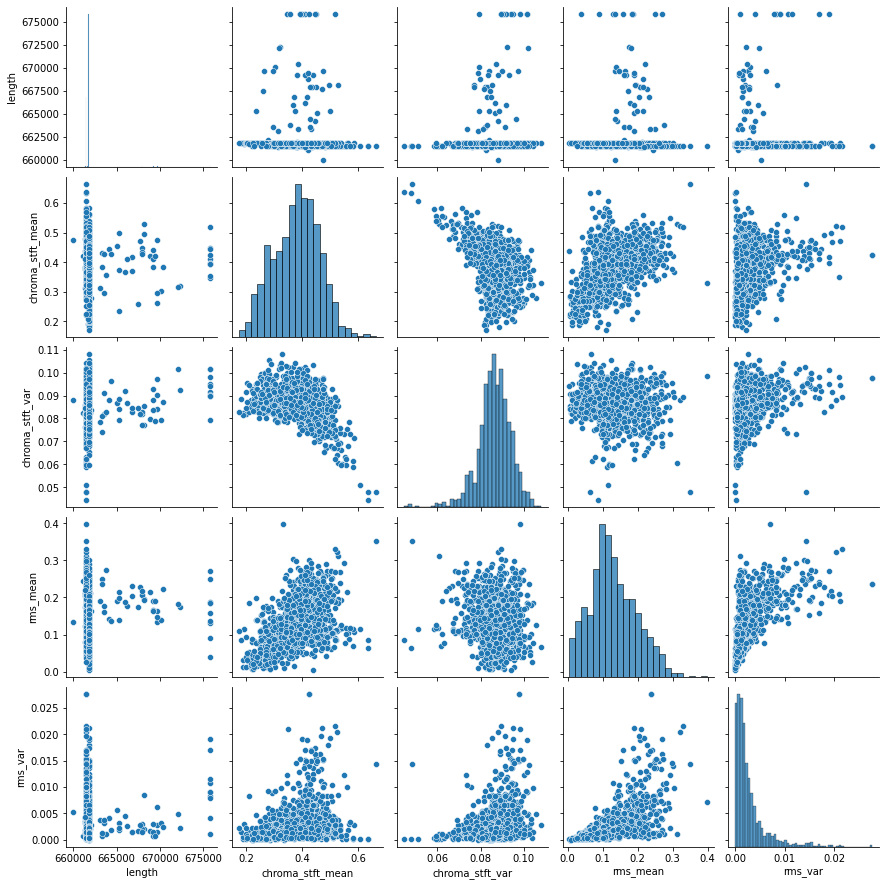

In [ ]:
#create a pair plot
sns.pairplot(df.iloc[:,1:6])


In [ ]:
#get the col-relation of the columns
df.iloc[:,3:12].corr()

,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var
chroma_stft_var,1.000000,-0.078777,0.290138,-0.246441,0.305819,-0.036896,0.346907,-0.168721,0.383134
rms_mean,-0.078777,1.000000,0.607399,0.510154,0.324077,0.530017,0.099830,0.537902,0.200083
rms_var,0.290138,0.607399,1.000000,0.347831,0.583353,0.402333,0.320793,0.368570,0.417880
spectral_centroid_mean,-0.246441,0.510154,0.347831,1.000000,0.520548,0.904435,0.011256,0.979637,0.198031
spectral_centroid_var,0.305819,0.324077,0.583353,0.520548,1.000000,0.622834,0.636494,0.545128,0.815550
spectral_bandwidth_mean,-0.036896,0.530017,0.402333,0.904435,0.622834,1.000000,0.220159,0.956189,0.438581
spectral_bandwidth_var,0.346907,0.099830,0.320793,0.011256,0.636494,0.220159,1.000000,0.053632,0.884877
rolloff_mean,-0.168721,0.537902,0.368570,0.979637,0.545128,0.956189,0.053632,1.000000,0.261685
rolloff_var,0.383134,0.200083,0.417880,0.198031,0.815550,0.438581,0.884877,0.261685,1.000000


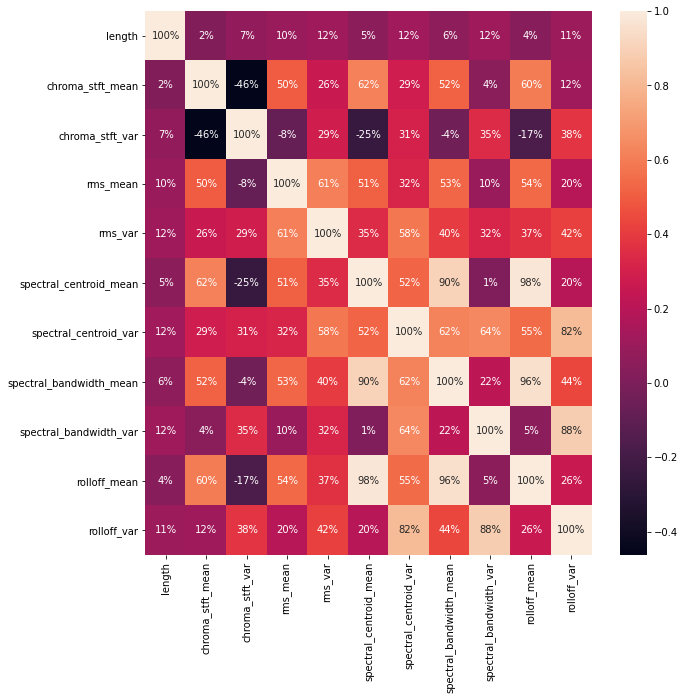

In [ ]:
#visualization the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:12].corr(),annot=True, fmt='.0%')

In [ ]:
#Splite the data set into independent (X) and dependent (Y) data sets
X=df.iloc[:,2:31].values
Y=df.iloc[:,1].values

In [ ]:
#split the data set into 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25 ,random_state=0)

In [ ]:
#Scale the data ( Feature Scaling)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train =sc.fit_transform(X_train)
X_test =sc.fit_transform(X_test)

In [ ]:
# create a function for the models
def models(X_train, Y_train):

  #Logstic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state=0)
  log.fit(X_train, Y_train)

  #Decision tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion ='entropy', random_state=0)
  tree.fit(X_train, Y_train)

  #Random Forest Classifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion= 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)


  #Print the model accuracy on the training data
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[2]Random Forest Classifier Training Accuracy:',forest.score(X_train, Y_train))

  

  
  return log, tree, forest 

In [ ]:
#getting all of the models
model= models(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0]Logistic Regression Training Accuracy: 0.664
[1]Decision Tree Classifier Training Accuracy: 1.0
[2]Random Forest Classifier Training Accuracy: 0.9933333333333333


In [ ]:
#show another way to get matrics of the model
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range (len(model)):
  print('model', i)
  print(classification_report(Y_test, model[i].predict(X_test)))
  print( accuracy_score(Y_test, model[i].predict(X_test)))
  print()

model 0
              precision    recall  f1-score   support

      660000       0.00      0.00      0.00         1
      661408       0.00      0.00      0.00         1
      661500       0.00      0.00      0.00         1
      661504       0.50      0.32      0.39        74
      661676       0.00      0.00      0.00         1
      661760       0.00      0.00      0.00         1
      661794       0.70      0.85      0.77       162
      663300       0.00      0.00      0.00         1
      663520       0.00      0.00      0.00         1
      665060       0.00      0.00      0.00         1
      665280       0.00      0.00      0.00         1
      667920       0.00      0.00      0.00         1
      668140       0.00      0.00      0.00         1
      669680       0.00      0.00      0.00         2
      672282       0.00      0.00      0.00         1
      675808       0.00      0.00      0.00         0

    accuracy                           0.65       250
   macro avg      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1